In [1]:
from DB.DBConnect import DBConnect
from DB.DBKeys import DBKeys
from SQLQueryes import SqlQueryes
import pandas as pd
import numpy as np

#увеличим дефолтный размер графиков
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

In [2]:
db = None
df = pd.DataFrame()

In [3]:
def DBOpen():
    dbKeys = DBKeys()
    global db 
    db = DBConnect(
        user=dbKeys.getDBUser(),
        password=dbKeys.getDBPassword(),
        host=dbKeys.getDBHost(),
        port=dbKeys.getDBPort(),
        database=dbKeys.getDBDatabase(),
        options=dbKeys.getDBOptions()
    )
    db.Connect()

In [4]:
def DBClose():
    db.Disconnect()

In [5]:
def Start():
    DBOpen()
    global db
    sqlQueryes = SqlQueryes(db)
    global df
    df = None
    df = sqlQueryes.InnerAllTables()
    db = DBClose()

In [6]:
def NormalizeDB():
    global df
    print(df.info())
    print(df.columns)
    df['ticket_no'] = df['ticket_no'].astype('Int64')
    df['boarding_no'] = df['boarding_no'].astype('Int64')
    df['seat_no'] = df['seat_no'].astype('string')
    df['fare_conditions'] = df['fare_conditions'].astype('string')
    df['amount'] = df['amount'].astype('Int64')
    df['flight_no'] = df['flight_no'].astype('string')
    df['departure_airport'] = df['departure_airport'].astype('string')
    df['arrival_airport'] = df['arrival_airport'].astype('string')
    df['status'] = df['status'].astype('string')
    df['model'] = df['model'].astype('string')
    df['airport_name_x'] = df['airport_name_x'].astype('string')
    df['city_x'] = df['city_x'].astype('string')
    df['airport_name_y'] = df['airport_name_y'].astype('string')
    df['city_y'] = df['city_y'].astype('string')
    df['book_ref'] = df['book_ref'].astype('string')
    df['total_amount'] = df['total_amount'].astype('Int64')
    df['passenger_name'] = df['passenger_name'].astype('string')
    print(df.info())
    print(df.columns)

In [7]:
def DrawPlotArea():
        print("Area chart")
        global df
        # 
        # График полетов по месяцам
        # Тип: Area chart
        #
        df_plot = df[['boarding_no', 'scheduled_arrival']]
        df_plot["count"] = range(len(df_plot))
        df_plot['month'] = [x.month for x in df_plot['scheduled_arrival']]
        df_plot['month'] = df_plot['month'].astype('Int16')
        # маска для получения строк с пропусками и без
        mask = df_plot[df_plot.columns].notnull().all(axis=1)
        df_plot_t = df_plot[~mask]
        df_plot = df_plot[mask]
        # 
        df_plot = df_plot[['count', 'month']].groupby('month').count().reset_index()
        df_plot_t = df_plot_t[['count', 'month']].groupby('month').count().reset_index()
        df_plot.insert(2, "count_withnan", df_plot_t['count'])
        df_plot_t = None
        # Создание графика
        df_plot.plot(
                kind='area', stacked=True, 
                x='month', y=['count', 'count_withnan'], 
                label=['Все кто полетели', 'Не полетели'])
        # настройка отображения графика
        plt.title('Полеты по месяцам')
        plt.xlabel('Месяц')
        plt.ylabel('Полеты')

        # print(df_plot)
        # print(df_plot['count_withnan'].mean())
        plt.xticks(np.arange(min(df_plot['month']), max(df_plot['month'])+1, 1))
        plt.yticks(np.arange(0, max(df_plot['count'])+max(df_plot['count_withnan']), df_plot['count_withnan'].mean()))
        plt.ticklabel_format(style='plain')
        plt.legend(
                title='Легенда', loc='upper left', 
                prop={'size': 12}, fontsize=14, shadow=True, framealpha=1, facecolor='y', edgecolor='r')
        plt.show()
        df_plot = None
        #
        # Конец Area chart
        #


In [21]:
def DrawPlotHist():
        print("Гистограмма")
        global df
        # 
        # График полетов по месяцам
        # Тип: Гистограмма
        #
        df_plot = df[['boarding_no', 'scheduled_arrival']]
        df_plot["count"] = range(len(df_plot))
        df_plot['month'] = [x.month for x in df_plot['scheduled_arrival']]
        df_plot['month'] = df_plot['month'].astype('Int16')
        # маска для получения строк с пропусками и без
        mask = df_plot[df_plot.columns].notnull().all(axis=1)
        df_plot = df_plot[mask]
        # 

        #df_plot['flight_no'] = [int(x[2:]) for x in df_plot['flight_no']]

        df_plot['month'].plot(kind='hist', 
                title='Частота покупок билетов по месяцам', bins=20)
        plt.xlabel('Месяц')
        plt.ylabel('Частота')
        
        plt.xticks(np.arange(min(df_plot['month']), max(df_plot['month'])+1, 1))
        plt.show()
        df_plot = None
        #
        # Конец Гистограмма
        #


In [9]:
def DrawPlotBar():
        print("Столбчатая")
        global df
        # 
        # График полетов по месяцам
        # Тип: Столбчатая
        #
        df_plot = pd.DataFrame(columns=['fare_conditions', 'book_ref'])
        df_plot = df[['fare_conditions', 'book_ref']].copy()
        df_plot = df_plot.dropna()
        
        df_plot = df_plot[['fare_conditions', 'book_ref']].groupby('fare_conditions').count()
        print(df_plot)

        df_plot.loc[['Business', 'Economy', 'Comfort']].plot(kind='bar', 
                title='Популярность классов',
                label=['Полетов'])
        plt.xlabel('Класс')
        plt.ylabel('Полеты')
        plt.legend(
                title='Легенда', loc='upper left', 
                prop={'size': 12}, fontsize=14, shadow=True, framealpha=1, facecolor='y', edgecolor='r')
        
        plt.show()
        df_plot = None
        #
        # Конец Столбчатая
        #


In [10]:
def DrawPlotPie():
        print("Круговая")
        global df
        # 
        # График полетов по месяцам
        # Тип: Круговая
        #
        count_vals = df[['boarding_no']].size
        count_empty = df[['boarding_no']].isnull().values.ravel().sum()
        count_norm = abs(count_vals - count_empty)
        df_plot = pd.DataFrame({'datas': [count_norm, count_empty]}, index=['not_empty', 'empty'])
        print(df_plot)

        df_plot.plot(kind='pie', y='datas',
                title='Соотношение полетевших к не полетевшим')


        plt.show()
        df_plot = None
        #
        # Конец Круговая
        #


In [11]:
def CalcDistant():
    print("Выбисления поля Distant")
    global df
    print(df.info())
    print(df.columns)
    df['distant'] = df.apply(lambda row: round(
            np.arccos(
                np.sin(
                    row['latitude_x'] * np.pi / 180
                )*np.sin(
                    row['latitude_y'] * np.pi / 180
                )+np.cos(
                    row['latitude_x'] * np.pi / 180
                )*np.cos(
                    row['latitude_y'] * np.pi / 180
                )*np.cos(
                    row['longitude_x'] * np.pi / 180 - row['longitude_y'] * np.pi / 180
                )
            ) * 6371,0) , axis=1)
    # df['Distant'] = df.apply(lambda row: min([row['A'], row['B']])-row['C'], axis=1)
    # [
        
    #     ) for viletlatitudeX in df['latitude_x'] for PriletlatitudeY in df['latitude_y'] for viletlongitudeX in df['longitude_x'] for PriletlongitudeY in df['longitude_y'] 
    # ]
        

    #Round(
    #   ArcCos(
    #       Sin(
    #           viletlatitude * Pi() / 180
    #       )*Sin(
    #           Priletlatitude * Pi() / 180
    #       )+Cos(
    #           viletlatitude * Pi() / 180
    #       )*Cos(
    #           Priletlatitude * Pi() / 180
    #       )*Cos(
    #           viletlongitude * Pi() / 180 -Priletlongitude * Pi() / 180
    #       )
    #   ) * 6371,0)

In [12]:
def DrawPlotScatter():
    global df
    df.plot(kind='scatter', 
        x='distant', 
        y='amount', 
        title='Зависимость между дистанцией и стоимостью билетов')

In [13]:
# df= df.drop(columns=[
#     'longitude_x', 'latitude_x', 'longitude_y', 'latitude_y'], axis=1)

In [ ]:
Start()
NormalizeDB()
df.to_pickle("df") 
df = None

Сохранение хначений df в файл. Для быстроты и для экономия память -1гб
было 8гб. После норамализации 5гб, а теперь 4гб ОЗУ.

In [14]:
df = None
df = pd.read_pickle("df")

In [15]:
print(df.columns)

Index(['ticket_no', 'boarding_no', 'seat_no', 'fare_conditions', 'amount',
       'flight_no', 'scheduled_departure', 'scheduled_arrival',
       'departure_airport', 'arrival_airport', 'status', 'actual_departure',
       'actual_arrival', 'model', 'airport_name_x', 'city_x', 'longitude_x',
       'latitude_x', 'airport_name_y', 'city_y', 'longitude_y', 'latitude_y',
       'book_ref', 'passenger_name', 'book_date', 'total_amount'],
      dtype='object')


Гипотеза: в октябе чаще всего купленные билеты не используют (нет посадочного талона)

Area chart


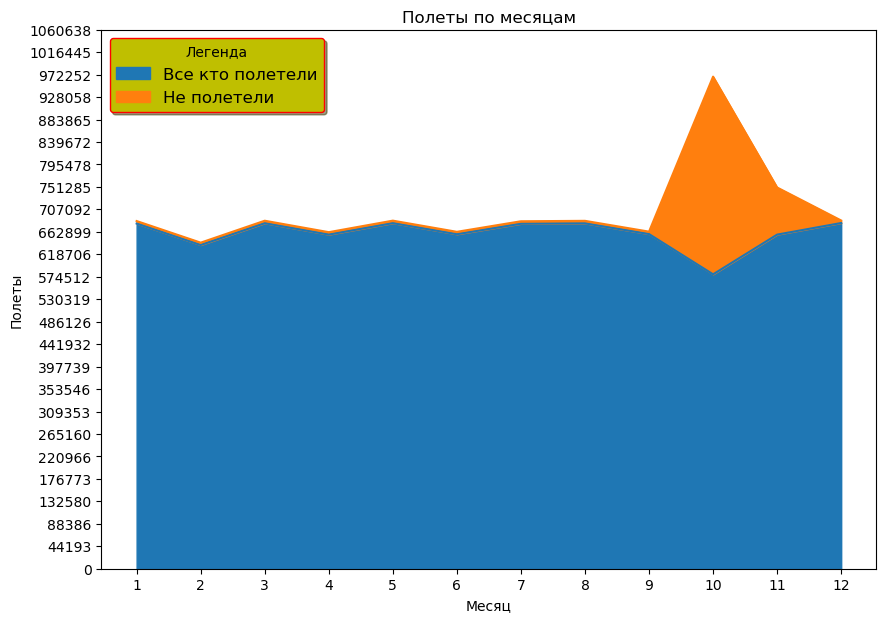

In [16]:
DrawPlotArea()

Гипотеза: в "ноябре" месяце посадки по билетам

Гистограмма


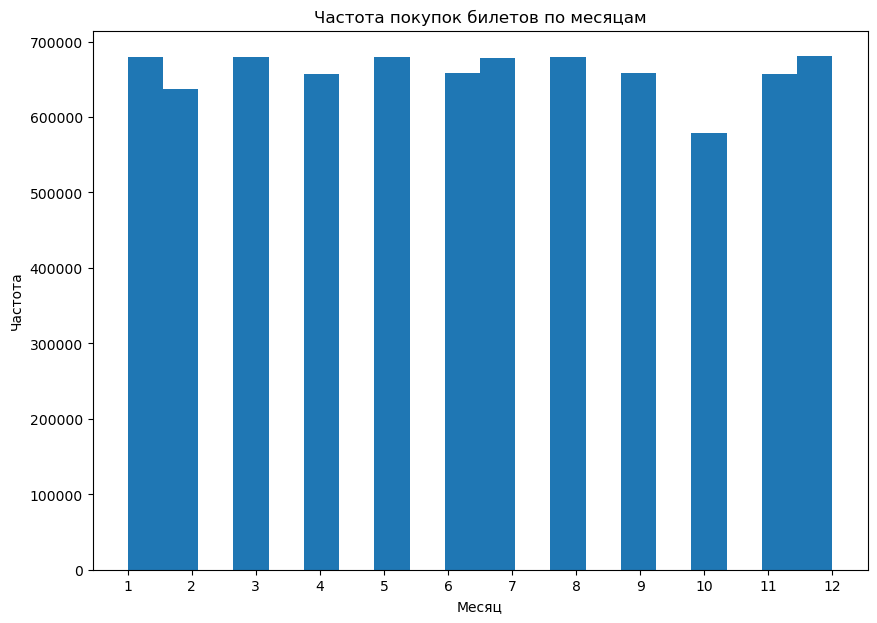

In [22]:
DrawPlotHist()

Гипотеза: Экономом покупают чаще всего

Столбчатая
                 book_ref
fare_conditions          
Business           859656
Comfort            139965
Economy           7392231


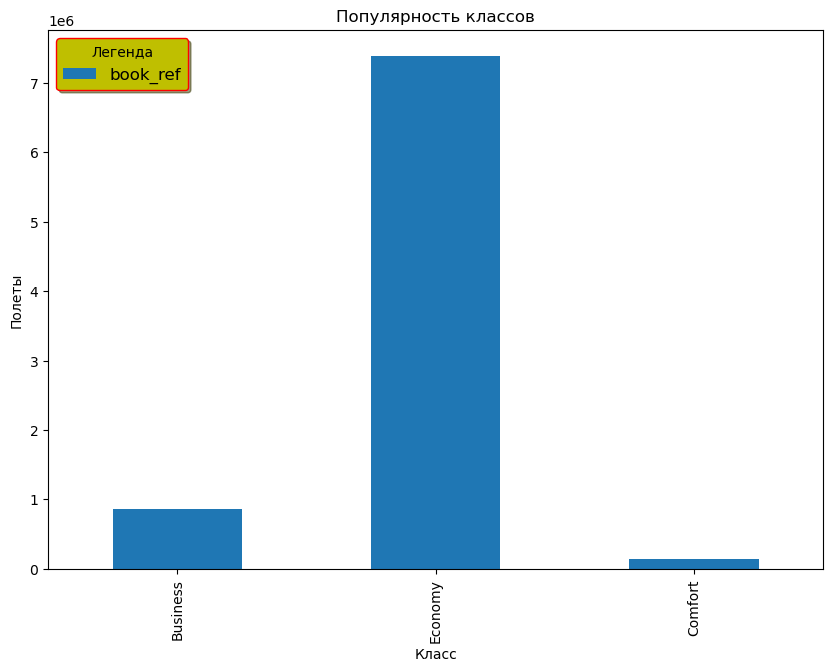

In [18]:
DrawPlotBar()

Гипотеза: процент не полетевших не превышает 25%

Круговая
             datas
not_empty  7925812
empty       530320


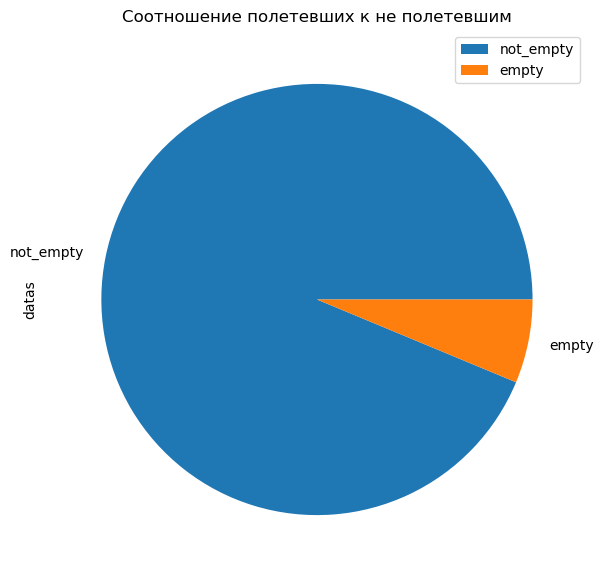

In [19]:
DrawPlotPie()

In [15]:
CalcDistant()

Выбисления поля Distant
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8456132 entries, 0 to 8456131
Data columns (total 26 columns):
 #   Column               Dtype              
---  ------               -----              
 0   ticket_no            Int64              
 1   boarding_no          Int64              
 2   seat_no              string             
 3   fare_conditions      string             
 4   amount               Int64              
 5   flight_no            string             
 6   scheduled_departure  datetime64[ns, UTC]
 7   scheduled_arrival    datetime64[ns, UTC]
 8   departure_airport    string             
 9   arrival_airport      string             
 10  status               string             
 11  actual_departure     datetime64[ns, UTC]
 12  actual_arrival       datetime64[ns, UTC]
 13  model                string             
 14  airport_name_x       string             
 15  city_x               string             
 16  longitude_x          float64  

Гипотиза: Дальность полета влияет на стоимость билета

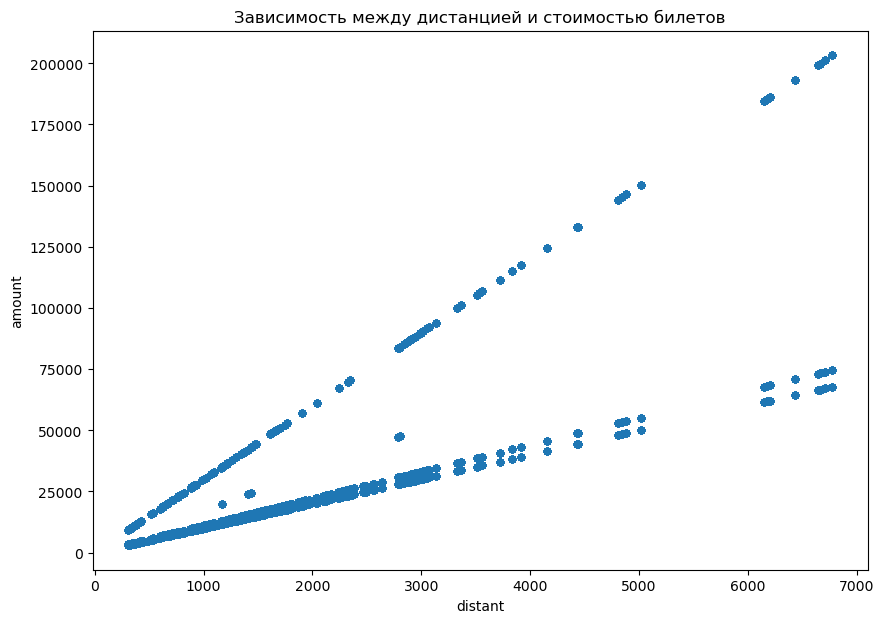

In [16]:
DrawPlotScatter()

In [15]:
import seaborn as sns

In [18]:
count_empty = df[['distant']].isnull().values.ravel().sum()
print(count_empty)
count_empty = df[['amount']].isnull().values.ravel().sum()
print(count_empty)
# df_regplot = df[['distant', 'amount']]
df_regplot = df.copy()
# df_regplot.info()
df_regplot = df_regplot.dropna().reset_index()
#df_regplot = df_regplot.fillna(0)
count_empty = df_regplot[['distant']].isnull().values.ravel().sum()
print(count_empty)
count_empty = df_regplot[['amount']].isnull().values.ravel().sum()
print(count_empty)

1
64280
0
0


In [37]:
    df_regplot['distant'] = df_regplot['distant'].astype('Int32')
    df_regplot['amount'] = df_regplot['amount'].astype('Int32')
    df_regplot['distant'] = df_regplot['distant'].astype('int32')
    df_regplot['amount'] = df_regplot['amount'].astype('int32')

In [38]:
df_regplot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920956 entries, 0 to 7920955
Data columns (total 28 columns):
 #   Column               Dtype              
---  ------               -----              
 0   index                int64              
 1   ticket_no            Int64              
 2   boarding_no          Int64              
 3   seat_no              string             
 4   fare_conditions      string             
 5   amount               int32              
 6   flight_no            string             
 7   scheduled_departure  datetime64[ns, UTC]
 8   scheduled_arrival    datetime64[ns, UTC]
 9   departure_airport    string             
 10  arrival_airport      string             
 11  status               string             
 12  actual_departure     datetime64[ns, UTC]
 13  actual_arrival       datetime64[ns, UTC]
 14  model                string             
 15  airport_name_x       string             
 16  city_x               string             
 17  longitud

Text(0.5, 1.0, 'Корреляция между distant и amount')

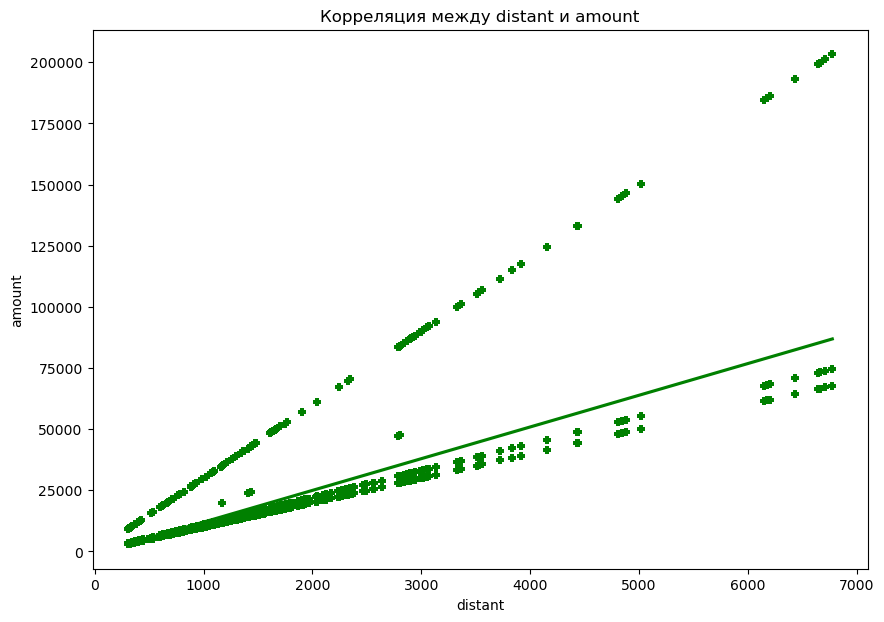

In [39]:
# посмотрим зависимость distant и amount
sns.regplot(data=df_regplot, x='distant', y='amount', color='green', marker='+', fit_reg=True)
plt.title('Корреляция между distant и amount')

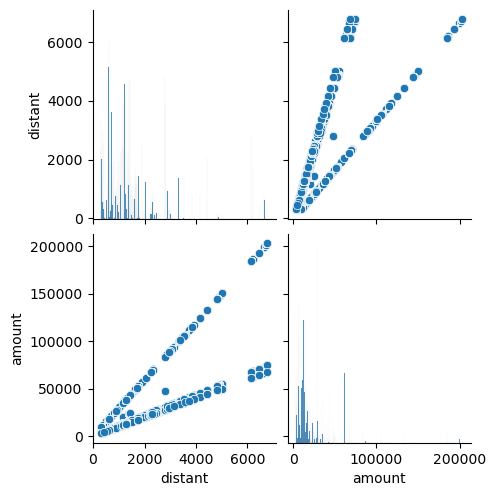

In [40]:
sns.pairplot(df[['distant', 'amount']])

In [17]:
df_heatmap = df.iloc[:1000000].pivot_table(
                        index='departure_airport', 
                        columns='arrival_airport', 
                        values='ticket_no', 
                        aggfunc='count').fillna(0)

In [18]:
df_heatmap

arrival_airport,AAQ,ABA,AER,ARH,BAX,CSY,KGD,KUF,KXK,LED,...,SLY,SVO,SVX,TJM,TOF,UCT,UFA,URJ,UUS,VOG
departure_airport,,,,,,,,,,,,,,,,,,,,,
AAQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2651.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27897.0,0.0,0.0,...,0.0,119922.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1759.0,0.0,0.0,0.0,0.0,0.0,0.0
BAX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7895.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CSY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3391.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KGD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KUF,0.0,0.0,29709.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KXK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='arrival_airport', ylabel='arrival_airport'>

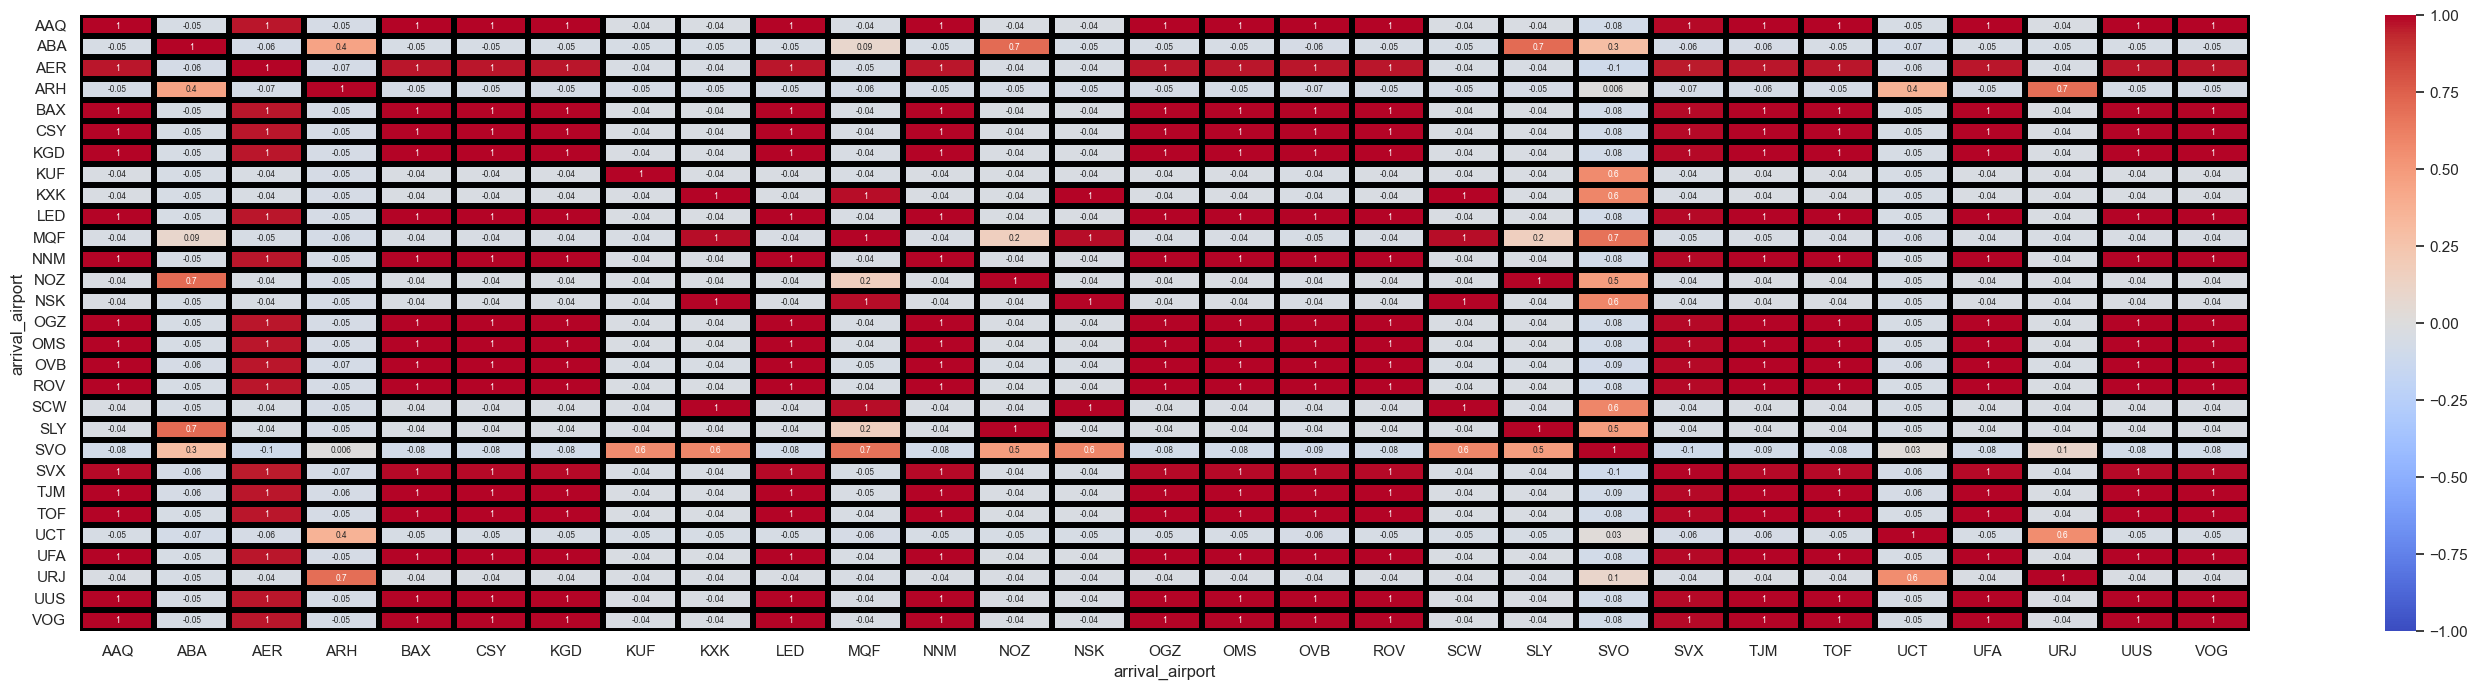

In [69]:
sns.set(rc = {'figure.figsize':(35,8)})
sns.heatmap(data = df_heatmap.corr(), annot_kws={"fontsize":6}, annot = True, fmt='.0g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')